In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from ema_workbench import load_results
from unbreakable.analysis.analyzer import *
from unbreakable.analysis.visualizer import *
sns.set_theme(style="ticks")

In [3]:
# Specify the country, return period, and number of scenarios and policies
country = 'Nigeria'
figures_folder = f'../../reports/{country}/figures/'
return_period = 100
n_scenarios = 1000
n_policies = 0
income_loss = True

# Load the results and prepare the outcomes
results = load_results(f'../../experiments/{country}/return_period={return_period}, scenarios={n_scenarios}, policies={n_policies}, conflict=True.tar.gz')
outcomes = prepare_outcomes(results, add_uncertainties=False, add_policies=False)

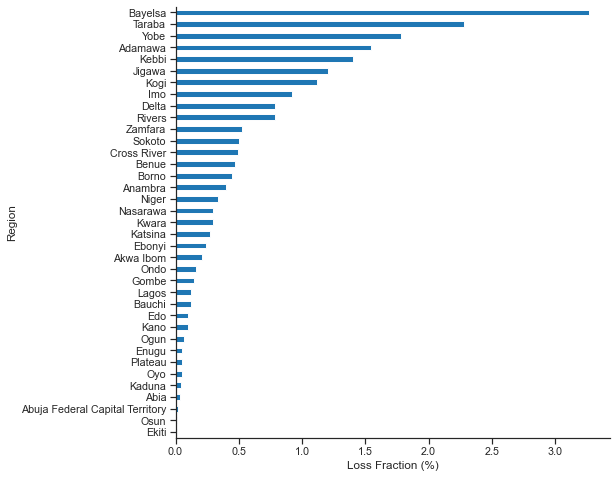

In [4]:
outcomes.groupby('region')['expected_loss_frac'].mean().sort_values(ascending=True).plot(kind='barh', figsize=(8, 8), color='tab:blue')
plt.xlabel('Loss Fraction (%)')
plt.ylabel('Region')
sns.despine()
plt.savefig(f'../../reports/Nigeria/figures/loss_fraction.png', dpi=300, bbox_inches='tight')

## Consumption loss

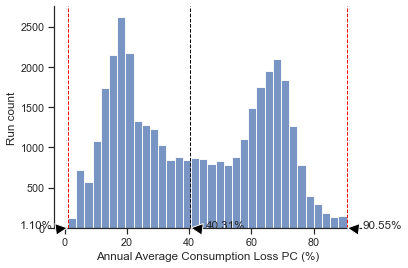

In [5]:
annotated_hist(outcomes, annotate=True)
plt.savefig(figures_folder + 'loss_distribution.png', dpi=300, bbox_inches='tight')

In [6]:
# Let's aggregate across scenarios and take the mean
df = outcomes.iloc[:, 2:-1].groupby('region').mean(numeric_only=True).round(2)
df['fraction_affected'] = df['n_aff_people'] / df['tot_pop']
df['fraction_affected'].sort_values(ascending=False)

region
Bayelsa                            0.099683
Taraba                             0.037463
Imo                                0.035582
Kogi                               0.029779
Yobe                               0.026871
Adamawa                            0.026615
Rivers                             0.026362
Kebbi                              0.024191
Delta                              0.023304
Jigawa                             0.018938
Anambra                            0.014998
Cross River                        0.010340
Sokoto                             0.008812
Kwara                              0.008477
Benue                              0.008432
Zamfara                            0.008231
Niger                              0.007655
Borno                              0.007525
Akwa Ibom                          0.006350
Nasarawa                           0.006200
Lagos                              0.005063
Ebonyi                             0.004789
Katsina                  

In [7]:
# Let's aggregate across scenarios and take the mean
outcomes.iloc[:, 2:-1].groupby('region').mean(numeric_only=True).round(2).sort_values(by='annual_avg_consum_loss_pct', ascending=False)

,random_seed,return_period,tot_pop,tot_households,n_aff_people,n_aff_households,n_retrofitted_ppl,n_retrofitted_hh,n_aff_retrofitted_ppl,n_aff_retrofitted_hh,...,n_poor_affected,n_new_poor,initial_poverty_gap,new_poverty_gap_initial,new_poverty_gap_all,annual_avg_consum_loss,annual_avg_consum_loss_pct,r,n_poor_ratio,n_new_poor_increase_pp
region,,,,,,,,,,,,,,,,,,,,,
Zamfara,4.999845e+08,100.0,4970397.01,5000.0,40913.60,41.51,0.0,0.0,0.0,0.0,...,25526.30,12806.23,28.32,28.77,28.94,384.67,72.22,0.39,62.0,0.26
Yobe,4.999845e+08,100.0,3658832.07,5000.0,98316.51,134.86,0.0,0.0,0.0,0.0,...,58062.90,30427.12,33.33,34.70,35.17,274.29,69.64,0.39,59.0,0.83
Katsina,4.999845e+08,100.0,8568827.81,5000.0,36302.37,21.32,0.0,0.0,0.0,0.0,...,15284.88,16980.29,25.51,25.75,25.94,314.42,69.39,0.41,42.0,0.20
Jigawa,4.999845e+08,100.0,6357922.97,5000.0,120408.41,94.77,0.0,0.0,0.0,0.0,...,95632.38,19155.69,39.65,40.45,40.54,208.15,68.97,0.41,79.0,0.30
Taraba,4.999845e+08,100.0,3345597.94,5000.0,125336.78,187.07,0.0,0.0,0.0,0.0,...,100404.90,17583.84,43.78,45.24,45.35,440.64,67.12,0.39,80.0,0.53
Borno,4.999845e+08,100.0,5751590.09,15000.0,43283.05,115.04,0.0,0.0,0.0,0.0,...,32078.41,6338.84,42.60,42.91,42.93,396.49,66.20,0.37,73.0,0.11
Plateau,4.999845e+08,100.0,4554835.91,5000.0,4668.19,5.23,0.0,0.0,0.0,0.0,...,2091.08,1543.66,28.85,28.91,28.94,512.70,65.74,0.40,43.0,0.03
Gombe,4.999845e+08,100.0,3585129.97,5000.0,8715.13,12.28,0.0,0.0,0.0,0.0,...,4197.35,3392.72,30.35,30.47,30.53,286.30,64.17,0.42,47.0,0.09
Bauchi,4.999845e+08,100.0,7239312.90,5000.0,14753.63,10.43,0.0,0.0,0.0,0.0,...,7410.48,5050.51,29.10,29.20,29.25,294.38,63.61,0.42,50.0,0.07


c:\users\mikhail\my drive\0 code\unbreakable\unbreakable\analysis\visualizer.py:545: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


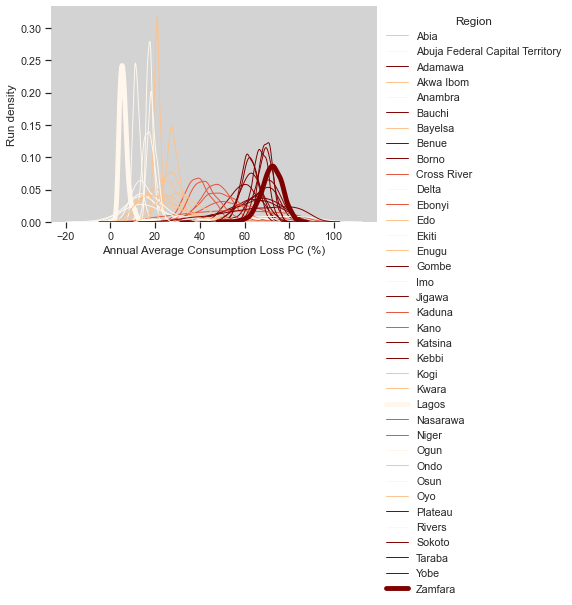

In [8]:
coloured_density_plots(outcomes, scheme='fisher_jenks', k=4)
plt.savefig(figures_folder + 'consumption_loss_density.png', dpi=300, bbox_inches='tight')

## Number of new poor

In [9]:
tab = outcomes.iloc[:, 2:-1].groupby('region').describe().round(2)
column = 'n_new_poor'
tab = tab.sort_values(by=(column, 'mean'), ascending=False)
tab = tab[[column]].iloc[:,1:]
tab.index.name = 'Region'
tab.columns = ['Mean', 'Std', 'Min', '25%', '50%', '75%', 'Max']
tab.style.format("{:,.0f}").background_gradient(cmap='Blues', axis=0)

,Mean,Std,Min,25%,50%,75%,Max
Region,,,,,,,
Kebbi,"49,900","5,811","33,226","45,710","49,950","53,990","69,020"
Bayelsa,"38,222","4,841","25,497","34,800","38,198","41,304","58,819"
Kogi,"34,910","5,653","19,416","30,879","34,721","38,762","52,595"
Yobe,"30,427","4,228","16,949","27,421","30,387","33,018","47,135"
Adamawa,"27,416","5,338","12,389","23,400","27,118","31,036","45,970"
Rivers,"26,228","7,334","6,428","21,296","26,140","30,866","52,202"
Benue,"25,407","4,599","12,246","22,303","25,109","28,727","46,731"
Imo,"25,278","6,737","8,654","20,367","24,888","29,676","51,957"
Jigawa,"19,156","4,673","6,057","16,030","19,118","22,217","34,719"


## Number of affected, annual average consumption loss, and socio-economic resilience

In [11]:
regions = outcomes['region'].unique().tolist()
n_regions = len(regions)
colors = sns.color_palette('Set2', n_colors=len(regions))

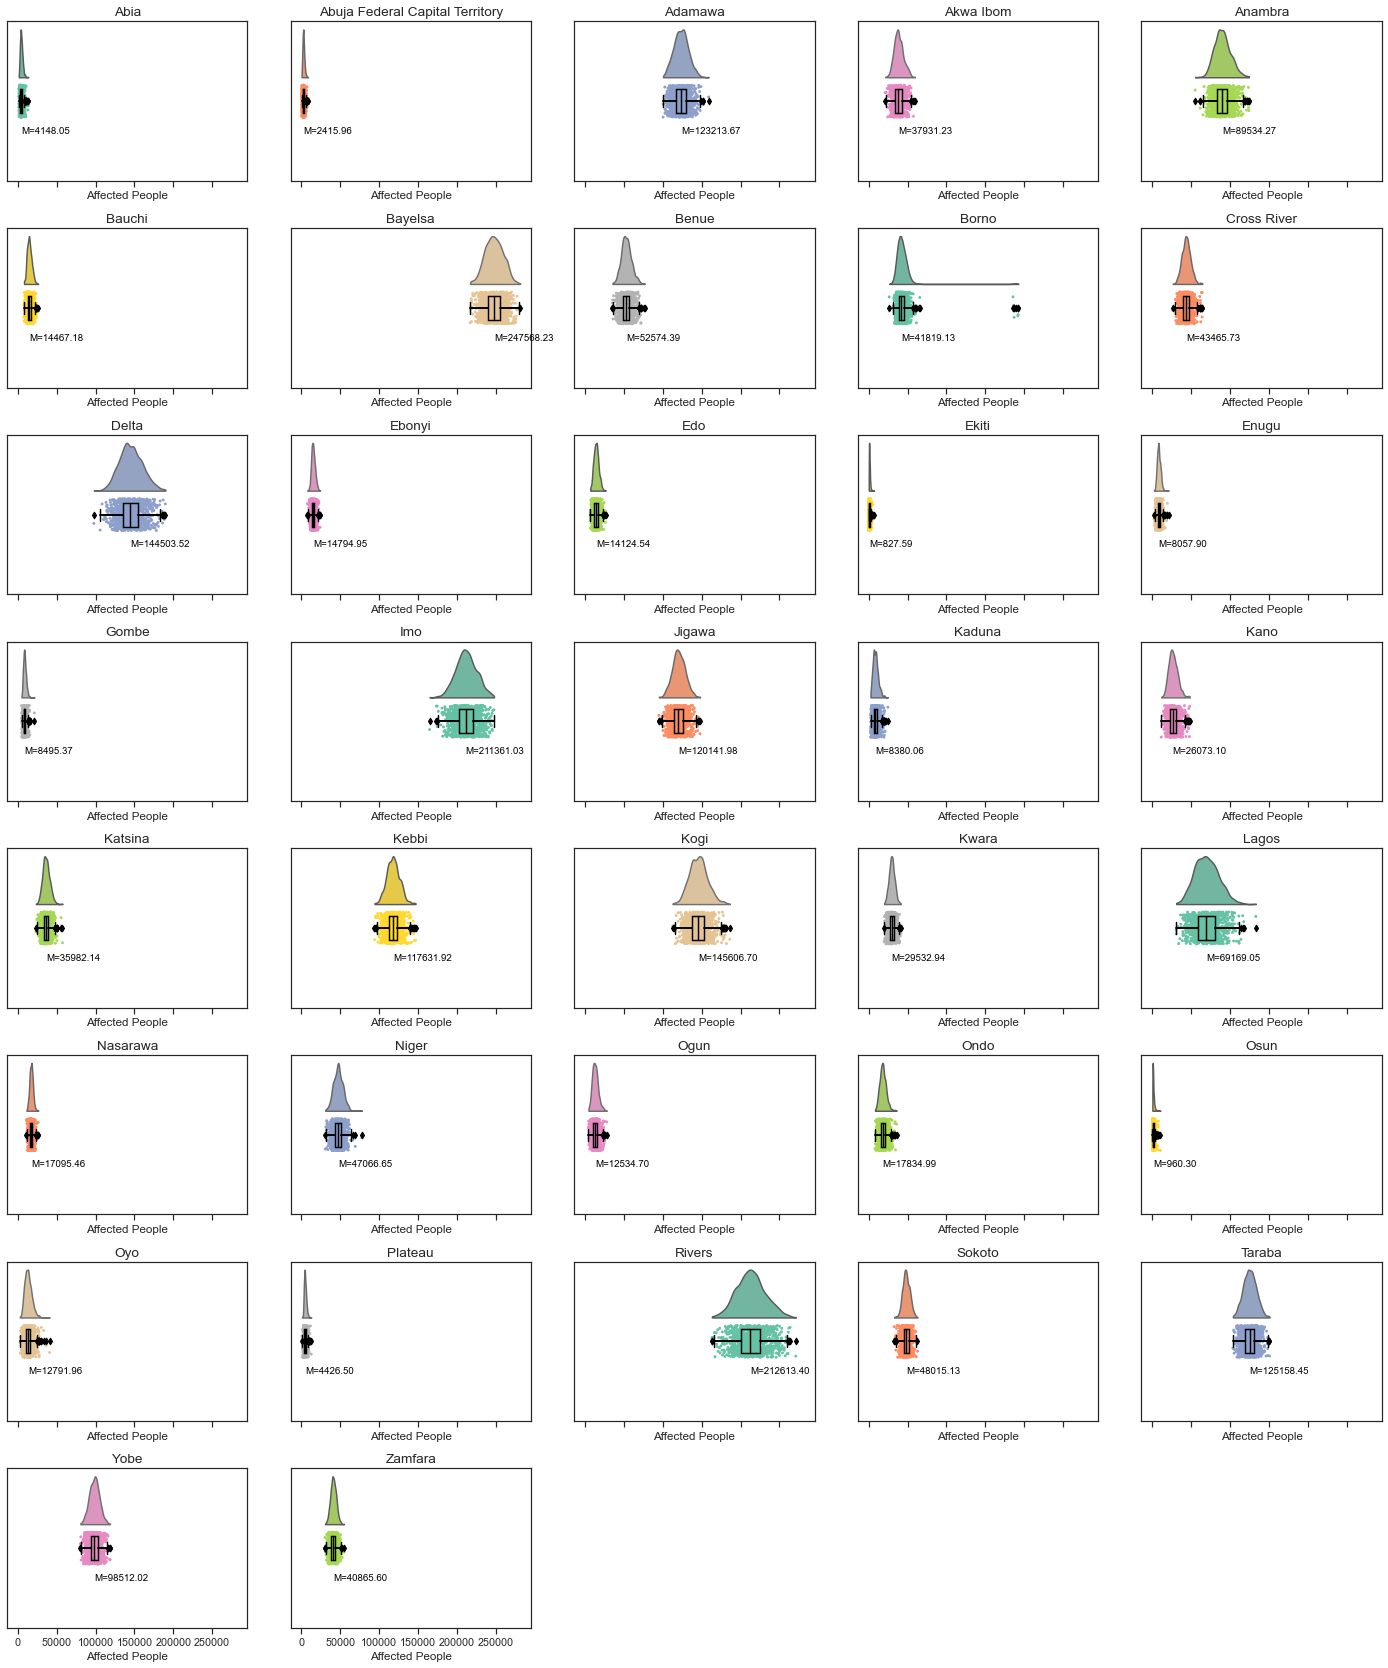

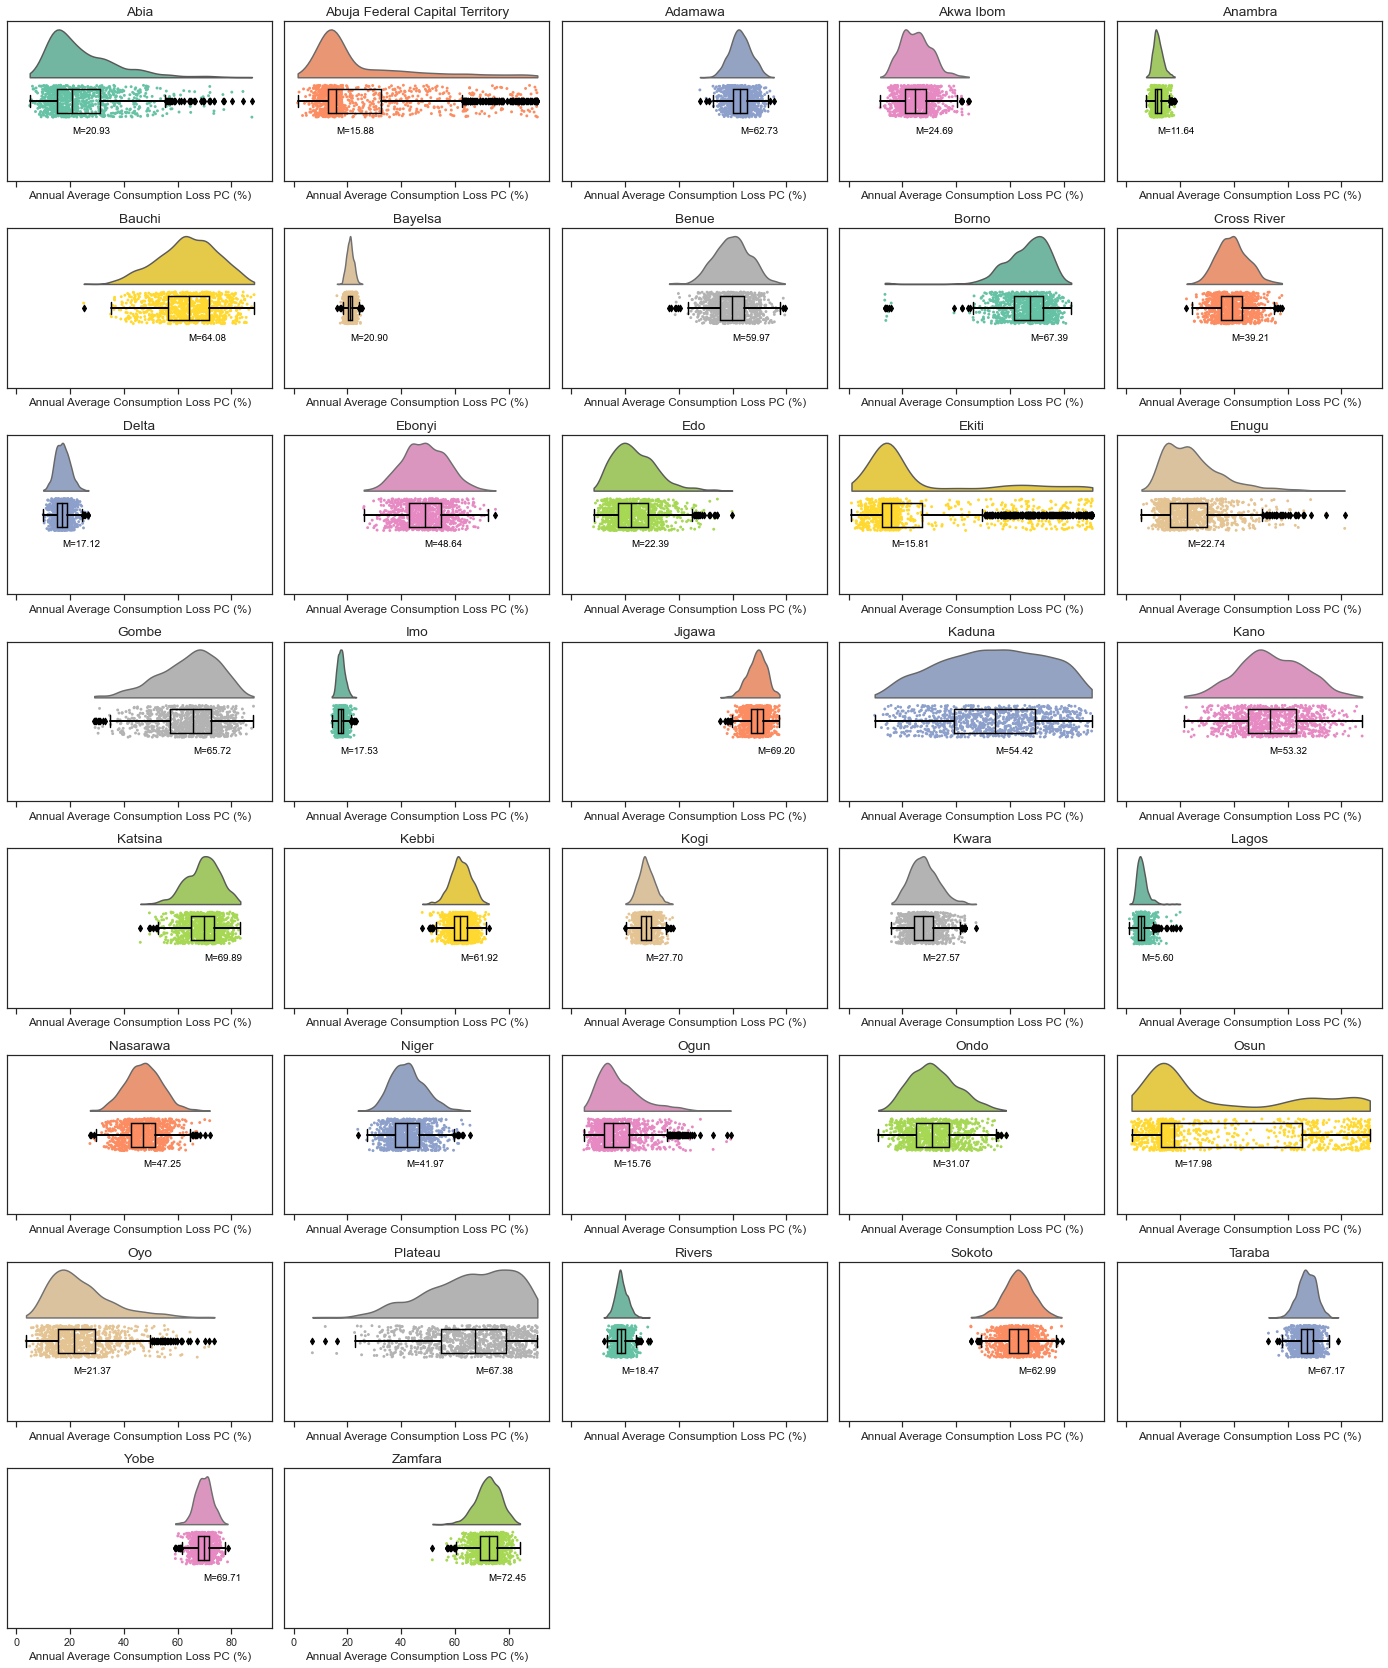

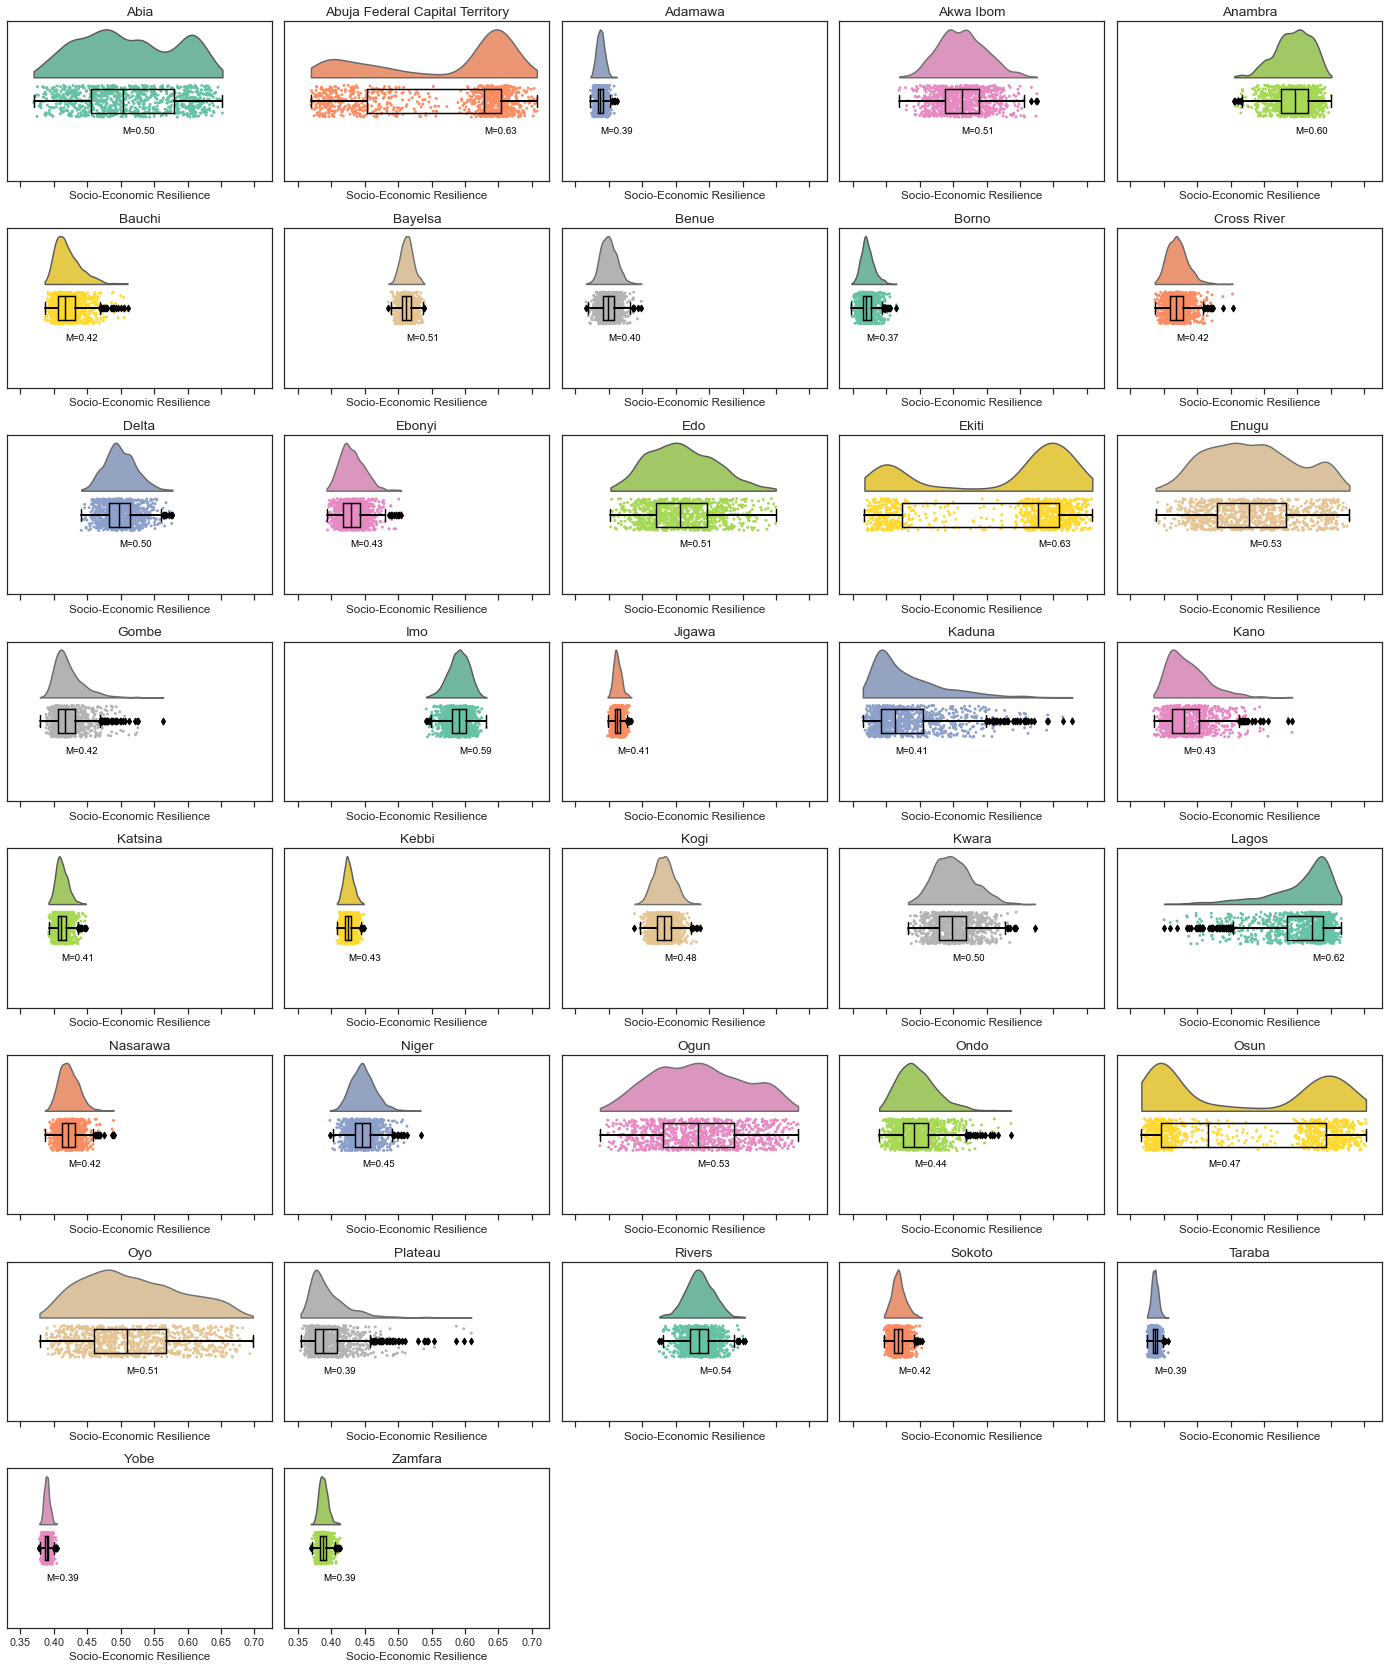

In [35]:
outcome_columns = [
    'n_aff_people',
    # 'n_new_poor_increase_pp',
    # 'n_new_poor',
    'annual_avg_consum_loss_pct',
    'r',
    # 'new_poverty_gap_initial',
    # 'new_poverty_gap_all',
]

outcome_names = [
    'Affected People',
    # 'New Poor Increase (p.p.)',
    # 'New Poor',
    f'Annual Average Consumption Loss PC (%)',
    'Socio-Economic Resilience',
    # 'New Poverty Gap Initial Poor',
    # 'New Poverty Gap All Poor'
    ]

for outcome_column, outcome_name in zip(outcome_columns, outcome_names):

    ncols = 5
    nrows = len(regions) // ncols + 1

    fig, ax = plt.subplots(ncols=ncols, nrows=nrows, figsize=(ncols * 4, nrows * 3), sharex=True)

    # Flatten the axes
    ax = ax.flatten()
    for region in regions:
        # Select the region
        df = outcomes[outcomes['region'] == region].copy()

        # Make a half violin plot
        pt.half_violinplot(x=outcome_column,
                        y='policy',
                        data=df,
                        color=colors[regions.index(region)],
                        bw=.2,
                        cut=0.,
                        scale="area",
                        width=.6,
                        inner=None,
                        ax=ax[regions.index(region)])

        # Add stripplot
        sns.stripplot(x=outcome_column,
                    y='policy',
                    data=df,
                    color=colors[regions.index(region)],
                    edgecolor='white',
                    size=3,
                    jitter=1,
                    zorder=0,
                    orient='h',
                    ax=ax[regions.index(region)])

        # Add boxplot
        sns.boxplot(x=outcome_column,
                    y='policy',
                    data=df,
                    color="black",
                    width=.15,
                    zorder=10,
                    showcaps=True,
                    boxprops={'facecolor': 'none', "zorder": 10},
                    showfliers=True,
                    whiskerprops={'linewidth': 2, "zorder": 10},
                    saturation=1,
                    orient='h',
                    ax=ax[regions.index(region)])

        ax[regions.index(region)].set_title(region, fontsize=14)
        ax[regions.index(region)].set_ylabel('')
        ax[regions.index(region)].set_xlabel(outcome_name)
        ax[regions.index(region)].set_yticklabels([])
        ax[regions.index(region)].set_yticks([])
        ax[regions.index(region)].text(df[outcome_column].median(), 0.2, f'M={df[outcome_column].median():.2f}', horizontalalignment='left', size='small', color='black')

    for i in range(len(regions), len(ax)):
        fig.delaxes(ax[i])

    fig.tight_layout()
    plt.savefig(f'../../reports/{country}/figures/{outcome_name}.png', dpi=300, bbox_inches='tight')

In [34]:
aggregation = 'median'
country = 'Nigeria'
aggregated_outcomes = get_spatial_outcomes(outcomes=outcomes, country=country, aggregation=aggregation)
aggregated_outcomes[['tot_exposed_asset', 'tot_consum_loss_npv', 'region_pml']] /= 1000000
aggregated_outcomes[['tot_exposed_asset', 'tot_consum_loss_npv', 'region_pml']] = aggregated_outcomes[['tot_exposed_asset', 'tot_consum_loss_npv', 'region_pml']].round(2)


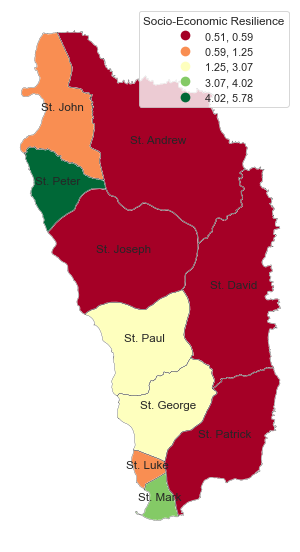

In [35]:
k = 5
# column = 'annual_avg_consum_loss_pct'
# title = 'Ann. Av. Cons. Loss PC (%)'
# cmap = 'YlOrRd'
column = 'r'
title = 'Socio-Economic Resilience'
cmap = 'RdYlGn'
# column = 'pml_relative'
# title = 'PML (%)'

# cmap = 'RdYlGn'
scheme = 'fisher_jenks'
ax = aggregated_outcomes.plot(column=column, scheme=scheme, k=k, cmap=cmap, legend=True, figsize=(10,10), legend_kwds={"title":title, "loc" : "upper right"})
aggregated_outcomes.plot(ax=ax, color='none', edgecolor='black', linewidth=0.25)
ax.axis('off')
for idx, row in aggregated_outcomes.iterrows():
    ax.annotate(text=row['NAME'], xy=row['geometry'].centroid.coords[0], ha='center', fontsize=12)
plt.savefig('r.png', dpi=300, bbox_inches='tight', transparent=True)
if savefig:
    plt.savefig(figures_folder + f'soc_econ_res_map.png', dpi=300, bbox_inches='tight')

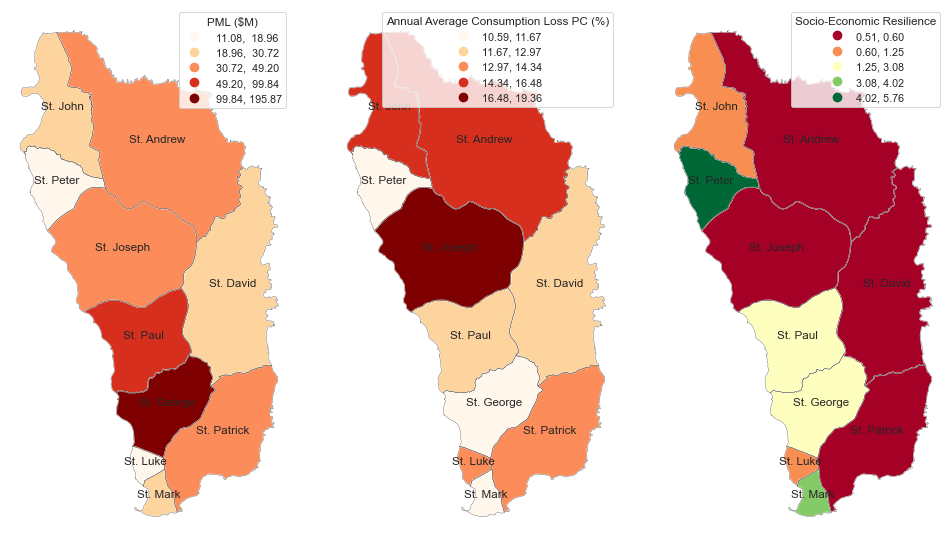

In [32]:
fig, ax = plt.subplots(ncols=3, figsize=(14,8))
k = 5
columns = ['region_pml', 'annual_avg_consum_loss_pct', 'r']
titles = ['PML ($M)', 'Annual Average Consumption Loss PC (%)', 'Socio-Economic Resilience']
cmaps = ['OrRd', 'OrRd', 'RdYlGn']

scheme = 'fisher_jenks'
for i, column in enumerate(columns):
    title = titles[i]
    cmap = cmaps[i]
    aggregated_outcomes.plot(column=column, scheme=scheme, k=k, cmap=cmap, legend=True, ax=ax[i], legend_kwds={"title":title, "loc" : "upper right"})
    aggregated_outcomes.plot(ax=ax[i], color='none', edgecolor='black', linewidth=0.25)
    ax[i].axis('off')
    for idx, row in aggregated_outcomes.iterrows():
        ax[i].annotate(text=row['NAME'], xy=row['geometry'].centroid.coords[0], ha='center', fontsize=12)
plt.tight_layout()
if savefig:
    plt.savefig(figures_folder + f'soc_econ_res_map.png', dpi=300, bbox_inches='tight')

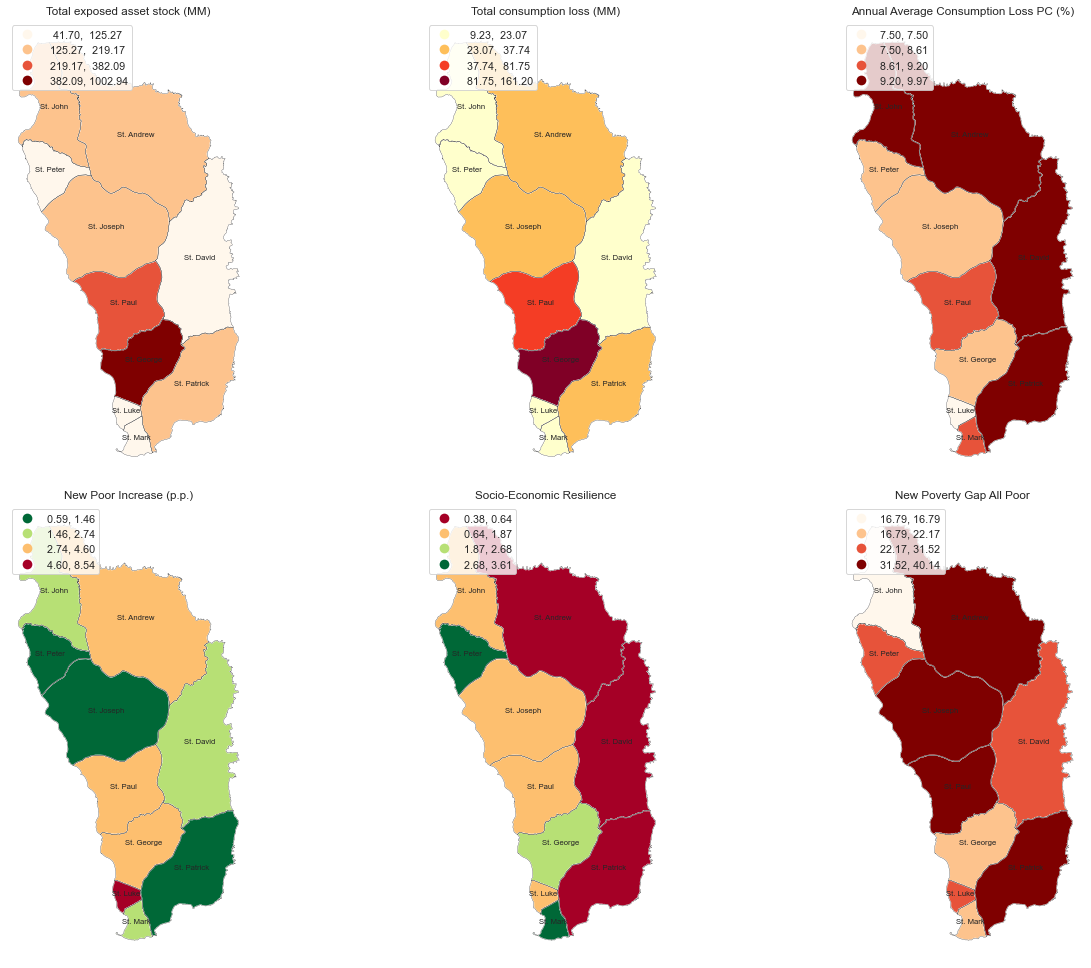

In [43]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(20, 14))

outcomes_to_plot = [
    'tot_exposed_asset',
    'total_consumption_loss',
    'annual_average_consumption_loss_pct',
    'n_new_poor_increase_pp',
    'r',
    'new_poverty_gap_all']

titles = ['Total exposed asset stock (MM)',
          'Total consumption loss (MM)',
          # 'Wt. Ann. Avg. Consump. Loss p.c. (%)',
          'Annual Average Consumption Loss PC (%)',
          'New Poor Increase (p.p.)',
          'Socio-Economic Resilience',
          'New Poverty Gap All Poor']

cmaps = ['OrRd', 'YlOrRd', 'OrRd', 'RdYlGn_r', 'RdYlGn', 'OrRd']

k = 4
for i, outcome in enumerate(outcomes_to_plot):
    aggregated_outcomes.plot(column=outcome, scheme='fisher_jenks', cmap=cmaps[i], k=k, ax=ax[i//3, i % 3], legend=True, legend_kwds={"loc": "upper left"})
    aggregated_outcomes.plot(ax=ax[i//3, i % 3], color='none', edgecolor='black', linewidth=0.25)
    ax[i//3, i % 3].set_title(titles[i])
    ax[i//3, i % 3].axis('off')
    for idx, row in aggregated_outcomes.iterrows():
        ax[i//3, i % 3].annotate(text=row['NAME'], xy=row['geometry'].centroid.coords[0], ha='center', fontsize=8)

# fig.suptitle(f'{aggregation.capitalize()} of 3,000 replications', fontsize=16)

fig.tight_layout()
if savefig:
    plt.savefig(figures_folder +
        f'{aggregation}_outcomes_spatially.png', dpi=300, bbox_inches='tight')

A bivariate or bi-variate choropleth helps to visualise relations between two variables spatially. 

In [118]:
# Load asset damage data
# asset_damage = pd.read_excel('../data/processed/asset_damage/Saint Lucia.xlsx')
# asset_damage['district'].replace({'AnseLaRayeCanaries' : 'Anse-La-Raye & Canaries'}, inplace=True)
# gdf = pd.merge(aggregated_outcomes, asset_damage, left_on='NAME_1', right_on='district', how='left')

In [92]:
# x_name = 'r'
# y_name = 'pml'
# x_label = 'Soc.-econ. res.'
# y_label = 'PML'

# tab = bivariate_choropleth(gdf.copy(), x_name, y_name, x_label, y_label, scheme='fisher_jenks', figsize=(7,6), return_table=True)
# if savefig:
#     plt.savefig('../reports/figures/analysis/bivariate_choropleth.png', dpi=300, bbox_inches='tight')

In [93]:
# nine_quadrants_plot(gdf.copy(), x_name, y_name)
# plt.xlabel('Socio-Economic Resilience')
# plt.ylabel('PML')
# if savefig:
#     plt.savefig('../reports/figures/analysis/9_quadrants.png', dpi=300, bbox_inches='tight')